#  Wafer fault Prediction

**Brief:** In electronics, a **wafer** (also called a slice or substrate) is a thin slice of semiconductor, such as a crystalline silicon (c-Si), used for the fabrication of integrated circuits and, in photovoltaics, to manufacture solar cells. The wafer serves as the substrate(serves as foundation for contruction of other components) for microelectronic devices built in and upon the wafer. 

It undergoes many microfabrication processes, such as doping, ion implantation, etching, thin-film deposition of various materials, and photolithographic patterning. Finally, the individual microcircuits are separated by wafer dicing and packaged as an integrated circuit.

## Problem Statement

**Data:** Wafers data


**Problem Statement:** Wafers are predominantly used to manufacture solar cells and are located at remote locations in bulk and they themselves consist of few hundreds of sensors. Wafers are fundamental of photovoltaic power generation, and production thereof requires high technology. Photovoltaic power generation system converts sunlight energy directly to electrical energy.

The motto behind figuring out the faulty wafers is to obliterate the need of having manual man-power doing the same. And make no mistake when we're saying this, even when they suspect a certain wafer to be faulty, they had to open the wafer from the scratch and deal with the issue, and by doing so all the wafers in the vicinity had to be stopped disrupting the whole process and stuff anf this is when that certain wafer was indeed faulty, however, when their suspicion came outta be false negative, then we can only imagine the waste of time, man-power and ofcourse, cost incurred.

**Solution:** Data fetched by wafers is to be passed through the machine learning pipeline and it is to be determined whether the wafer at hand is faulty or not apparently obliterating the need and thus cost of hiring manual labour.

## # Import Required Libraries:

In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
## Load the feature store dataset as dataframe
file_path = r"wafer_23012020_041211.csv"
wafers = pd.read_csv(file_path)
print("Shape of the feature store dataset: ", wafers.shape)
wafers.head()

Shape of the feature store dataset:  (100, 592)


,Unnamed: 0,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [3]:
wafers.columns

Index(['Unnamed: 0', 'Sensor-1', 'Sensor-2', 'Sensor-3', 'Sensor-4',
       'Sensor-5', 'Sensor-6', 'Sensor-7', 'Sensor-8', 'Sensor-9',
       ...
       'Sensor-582', 'Sensor-583', 'Sensor-584', 'Sensor-585', 'Sensor-586',
       'Sensor-587', 'Sensor-588', 'Sensor-589', 'Sensor-590', 'Good/Bad'],
      dtype='object', length=592)

In [4]:
wafers.drop(columns = ['Unnamed: 0', 'Good/Bad']).iloc[:100].to_csv('test_csv', index = False)

In [5]:
wafers.rename(columns = {'Unnamed: 0' : 'wafer'}, inplace = True)

In [6]:
wafers.head()

,wafer,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
0,Wafer-801,2968.33,2476.58,2216.7333,1748.0885,1.1127,100.0,97.5822,0.1242,1.5300,...,NaN,0.5004,0.0120,0.0033,2.4069,0.0545,0.0184,0.0055,33.7876,-1
1,Wafer-802,2961.04,2506.43,2170.0666,1364.5157,1.5447,100.0,96.7700,0.1230,1.3953,...,NaN,0.4994,0.0115,0.0031,2.3020,0.0545,0.0184,0.0055,33.7876,1
2,Wafer-803,3072.03,2500.68,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.3896,...,NaN,0.4987,0.0118,0.0036,2.3719,0.0545,0.0184,0.0055,33.7876,-1
3,Wafer-804,3021.83,2419.83,2205.7445,1363.1048,1.0518,100.0,101.8644,0.1220,1.4108,...,NaN,0.4934,0.0123,0.0040,2.4923,0.0545,0.0184,0.0055,33.7876,-1
4,Wafer-805,3006.95,2435.34,2189.8111,1084.6502,1.1993,100.0,104.8856,0.1234,1.5094,...,NaN,0.4987,0.0145,0.0041,2.8991,0.0545,0.0184,0.0055,33.7876,-1


In [7]:
# Train Test Split
from sklearn.model_selection import train_test_split

wafers, wafers_test = train_test_split(wafers, test_size = 0.20, random_state = 42)

In [8]:
wafers.shape

(80, 592)

In [9]:
wafers_test.shape

(20, 592)

In [10]:
wafers.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80 entries, 55 to 51
Columns: 592 entries, wafer to Good/Bad
dtypes: float64(494), int64(97), object(1)
memory usage: 370.6+ KB


In [11]:
wafers.describe()

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-6,Sensor-7,Sensor-8,Sensor-9,Sensor-10,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
count,79.000000,80.000000,78.000000,78.000000,78.000000,78.0,78.000000,78.000000,80.000000,80.000000,...,27.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,3019.048228,2494.058875,2202.758988,1519.467071,1.201382,100.0,96.881160,0.122158,1.460087,0.000946,...,63.785093,0.499493,0.013905,0.003591,2.785103,0.023543,0.014155,0.004439,72.116730,-0.850000
std,72.665372,68.166898,31.633772,471.962104,0.365870,0.0,5.520108,0.002062,0.072159,0.010865,...,30.722790,0.003683,0.004577,0.000908,0.923064,0.011668,0.007263,0.002324,50.770394,0.530106
min,2889.670000,2254.990000,2114.666700,978.783200,0.753100,100.0,83.423300,0.116000,1.317900,-0.026500,...,20.309100,0.492500,0.007600,0.002100,1.515200,0.009900,0.004800,0.001700,20.309100,-1.000000
25%,2975.425000,2452.517500,2189.966700,1111.543600,0.850075,100.0,93.547250,0.120800,1.409950,-0.005750,...,46.961400,0.497175,0.011500,0.003100,2.298350,0.013850,0.009000,0.002650,33.654025,-1.000000
50%,3004.390000,2502.445000,2200.955600,1308.647900,1.164250,100.0,99.217800,0.122150,1.451900,0.001500,...,54.476100,0.499450,0.012950,0.003400,2.577150,0.021800,0.013100,0.003800,59.082500,-1.000000
75%,3065.730000,2532.755000,2212.866700,1997.641600,1.383000,100.0,101.133300,0.123375,1.498675,0.009000,...,80.740300,0.501700,0.014950,0.003925,2.992300,0.028100,0.018400,0.005750,93.190025,-1.000000
max,3221.210000,2664.520000,2315.266700,2363.641200,2.207300,100.0,103.091100,0.126200,1.641100,0.025000,...,151.193000,0.508700,0.043700,0.008900,8.816000,0.054500,0.033400,0.012000,223.101800,1.000000


In [12]:
# Looking at the cats in our Target feature
wafers['Good/Bad'].value_counts()

Good/Bad
-1    74
 1     6
Name: count, dtype: int64

# Insinghts
Heavily imbalanced. Definitely gonna need resampling

## Analyzing the missing data
Firstly, we'll check the missing data in the target feature and drop those records. **As if we already know a value of target feature then there's no need for a ML algorithm, damn right?** Therefore, the best way to deal with missing target entries is to delete them. For other missing features, we can definitely use impute strategies.

In [13]:
# Checking missing values in the target feature
wafers['Good/Bad'].isna().sum()

0

=> Not even a single missing entry in the target column

In [14]:
wafers.isna().sum().sum()

1822

In [15]:
# Checking missing values in dependent feature variables
wafers.isna().sum().sum()/ (wafers.shape[0] * (wafers.shape[1]-1))

0.038536379018612524

In [16]:
wafers.shape[1]

592

In [17]:
wafers.shape[0]

80

**=>** Almost 4% out of total cells we're having, are missing.

We're gonna try all sort of imputation strategies and would choose the one with that's gonna give us least overall-error-val.

## # Visualization of Sensors' distribution:

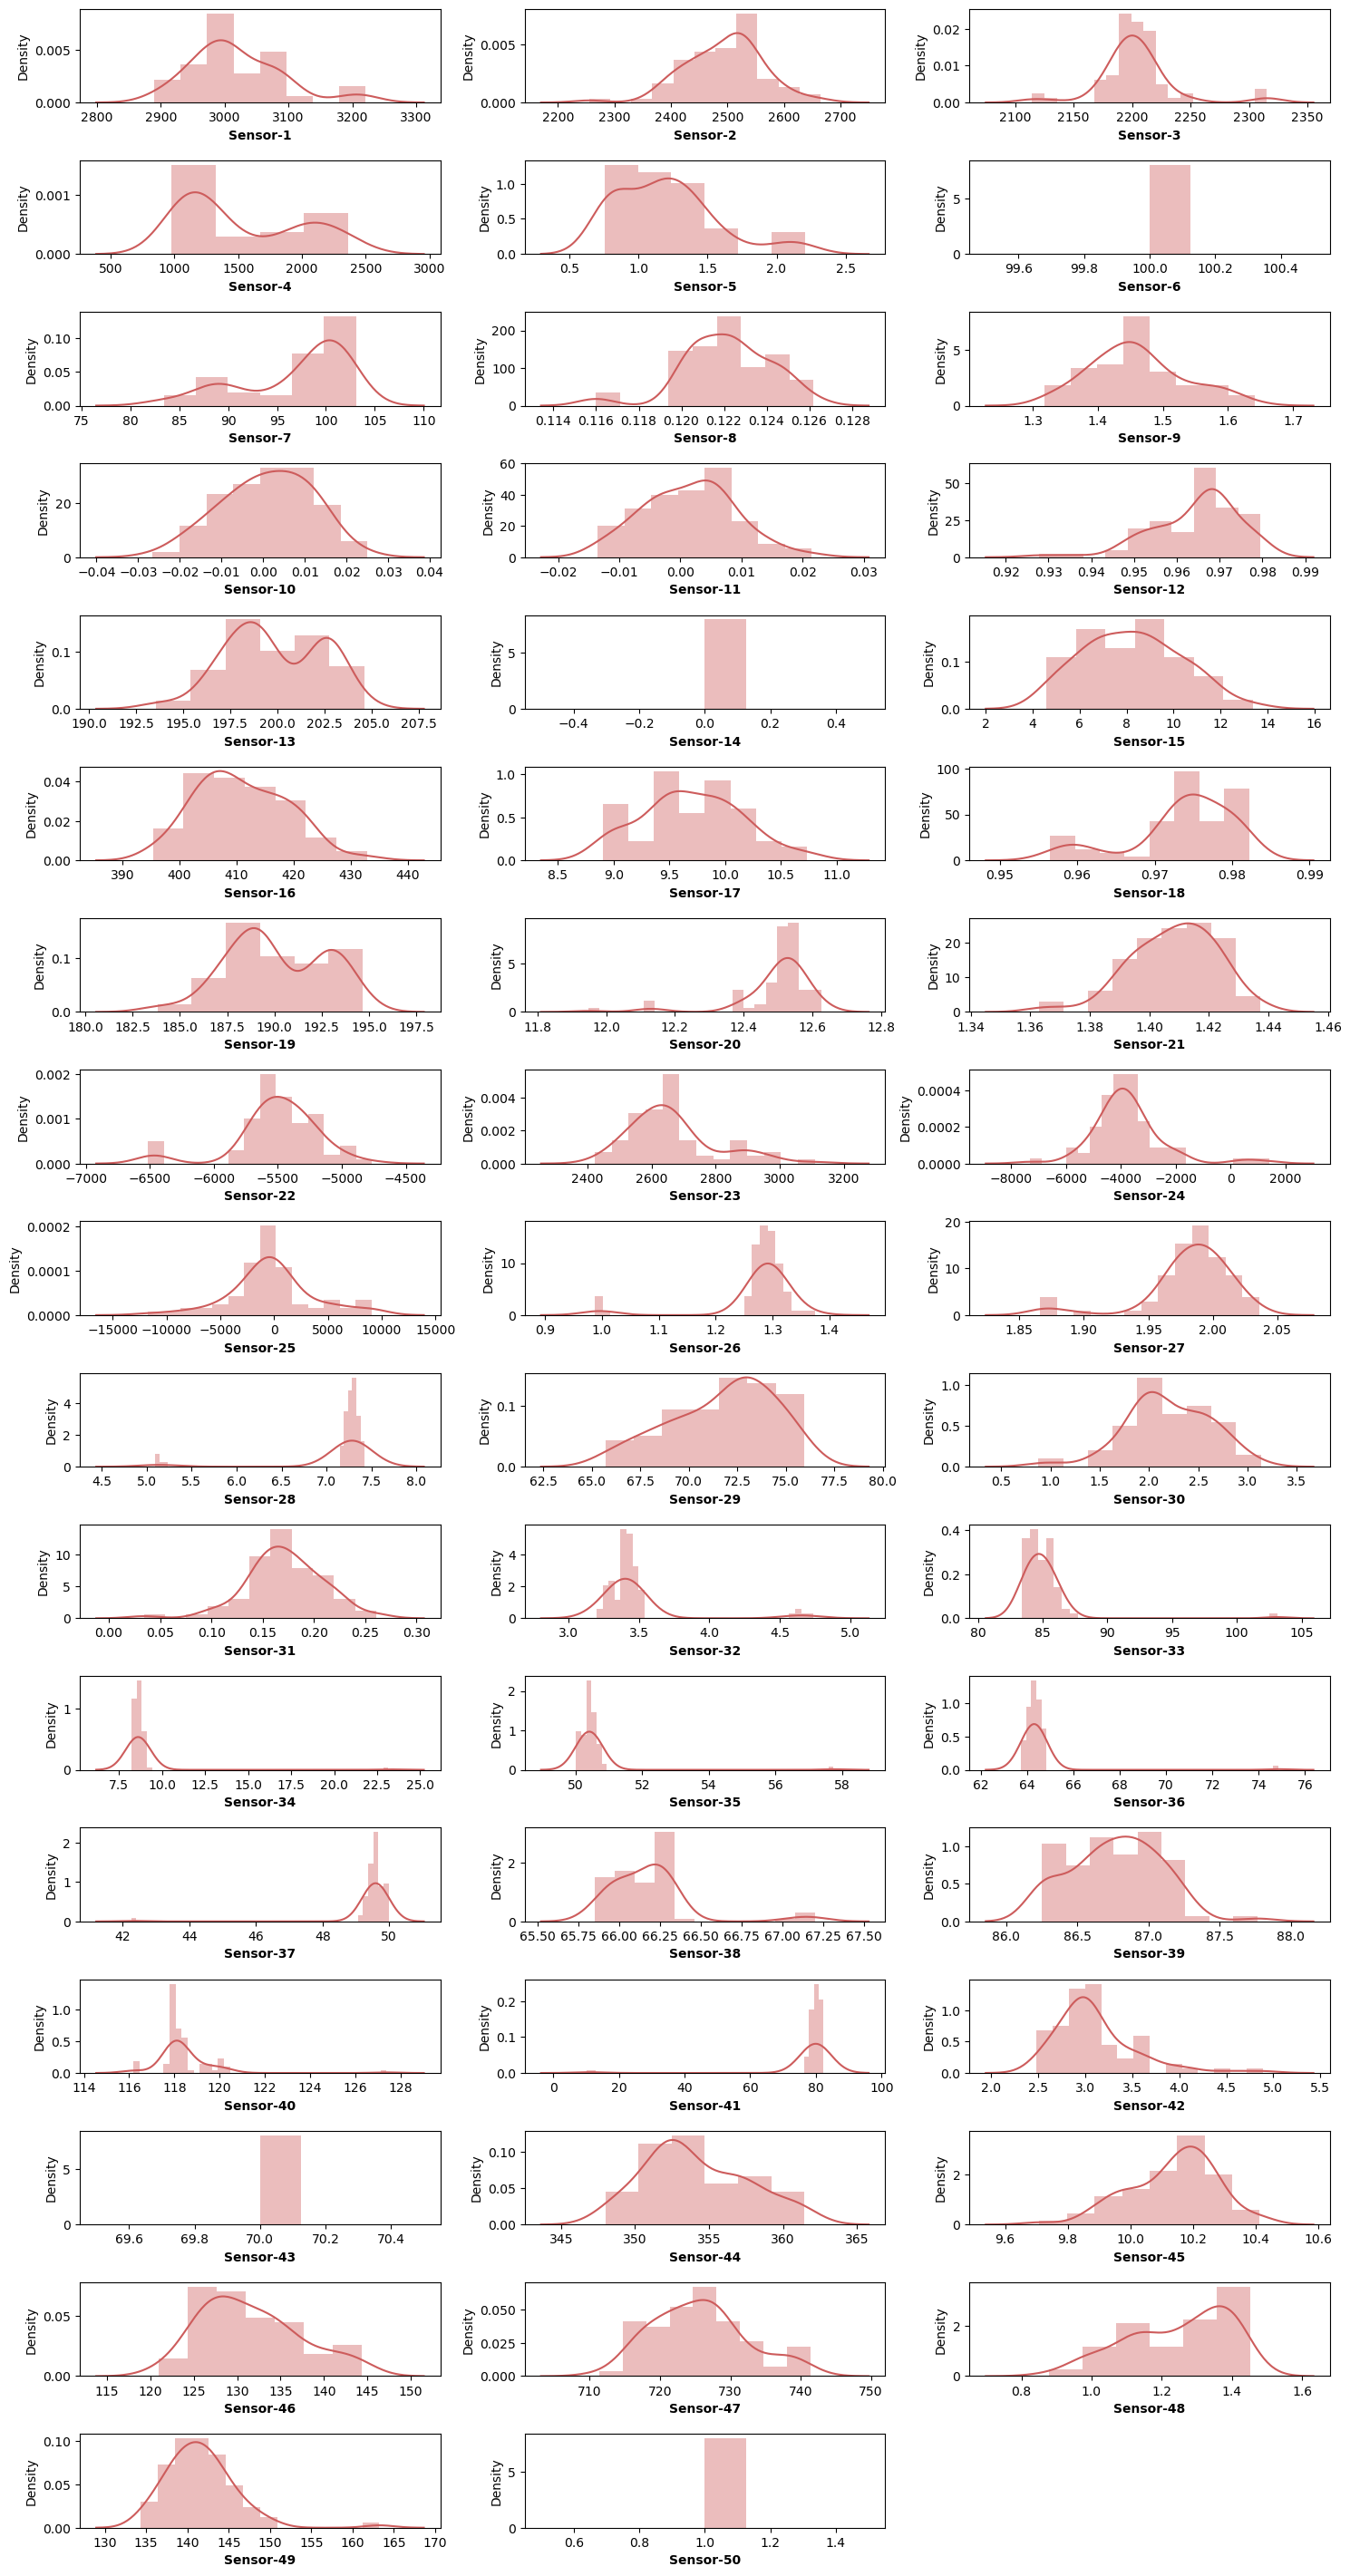

In [18]:
# Lets have a look at the distribution first 50 sensors of wafers

plt.figure(figsize=(15,100))

for i, col in enumerate(wafers.columns[1:51]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x = wafers[col], color = 'indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

### Variety of Distrinution:
1. Some sensors, like Sensor-1, Sensor-2 and Sensor-3 have fairly normal (bell-shape) distributions.

2. Others, like Sensor-14 and Sensor-15 show a distribution concentrated in a single value, indication very little or no variation

3. Some sensors, like Sensor-13, Sensor-22 and Sensor-24 show multi-model distribution, indicating the presense of multiple distinct operating states or clusters  of readings.

### Presence of Outliers:
1. For sensors like Sensor-26, Sensor-29, Sensor-38, the distribution plots show sharp peaks or isolated bars at certain values, suggesting the presence of outliers or anomalies.

2. Sensors Sensor-6 has a flat distribution, which may indicate that this sensor is either malfunctioning or captuing a constant

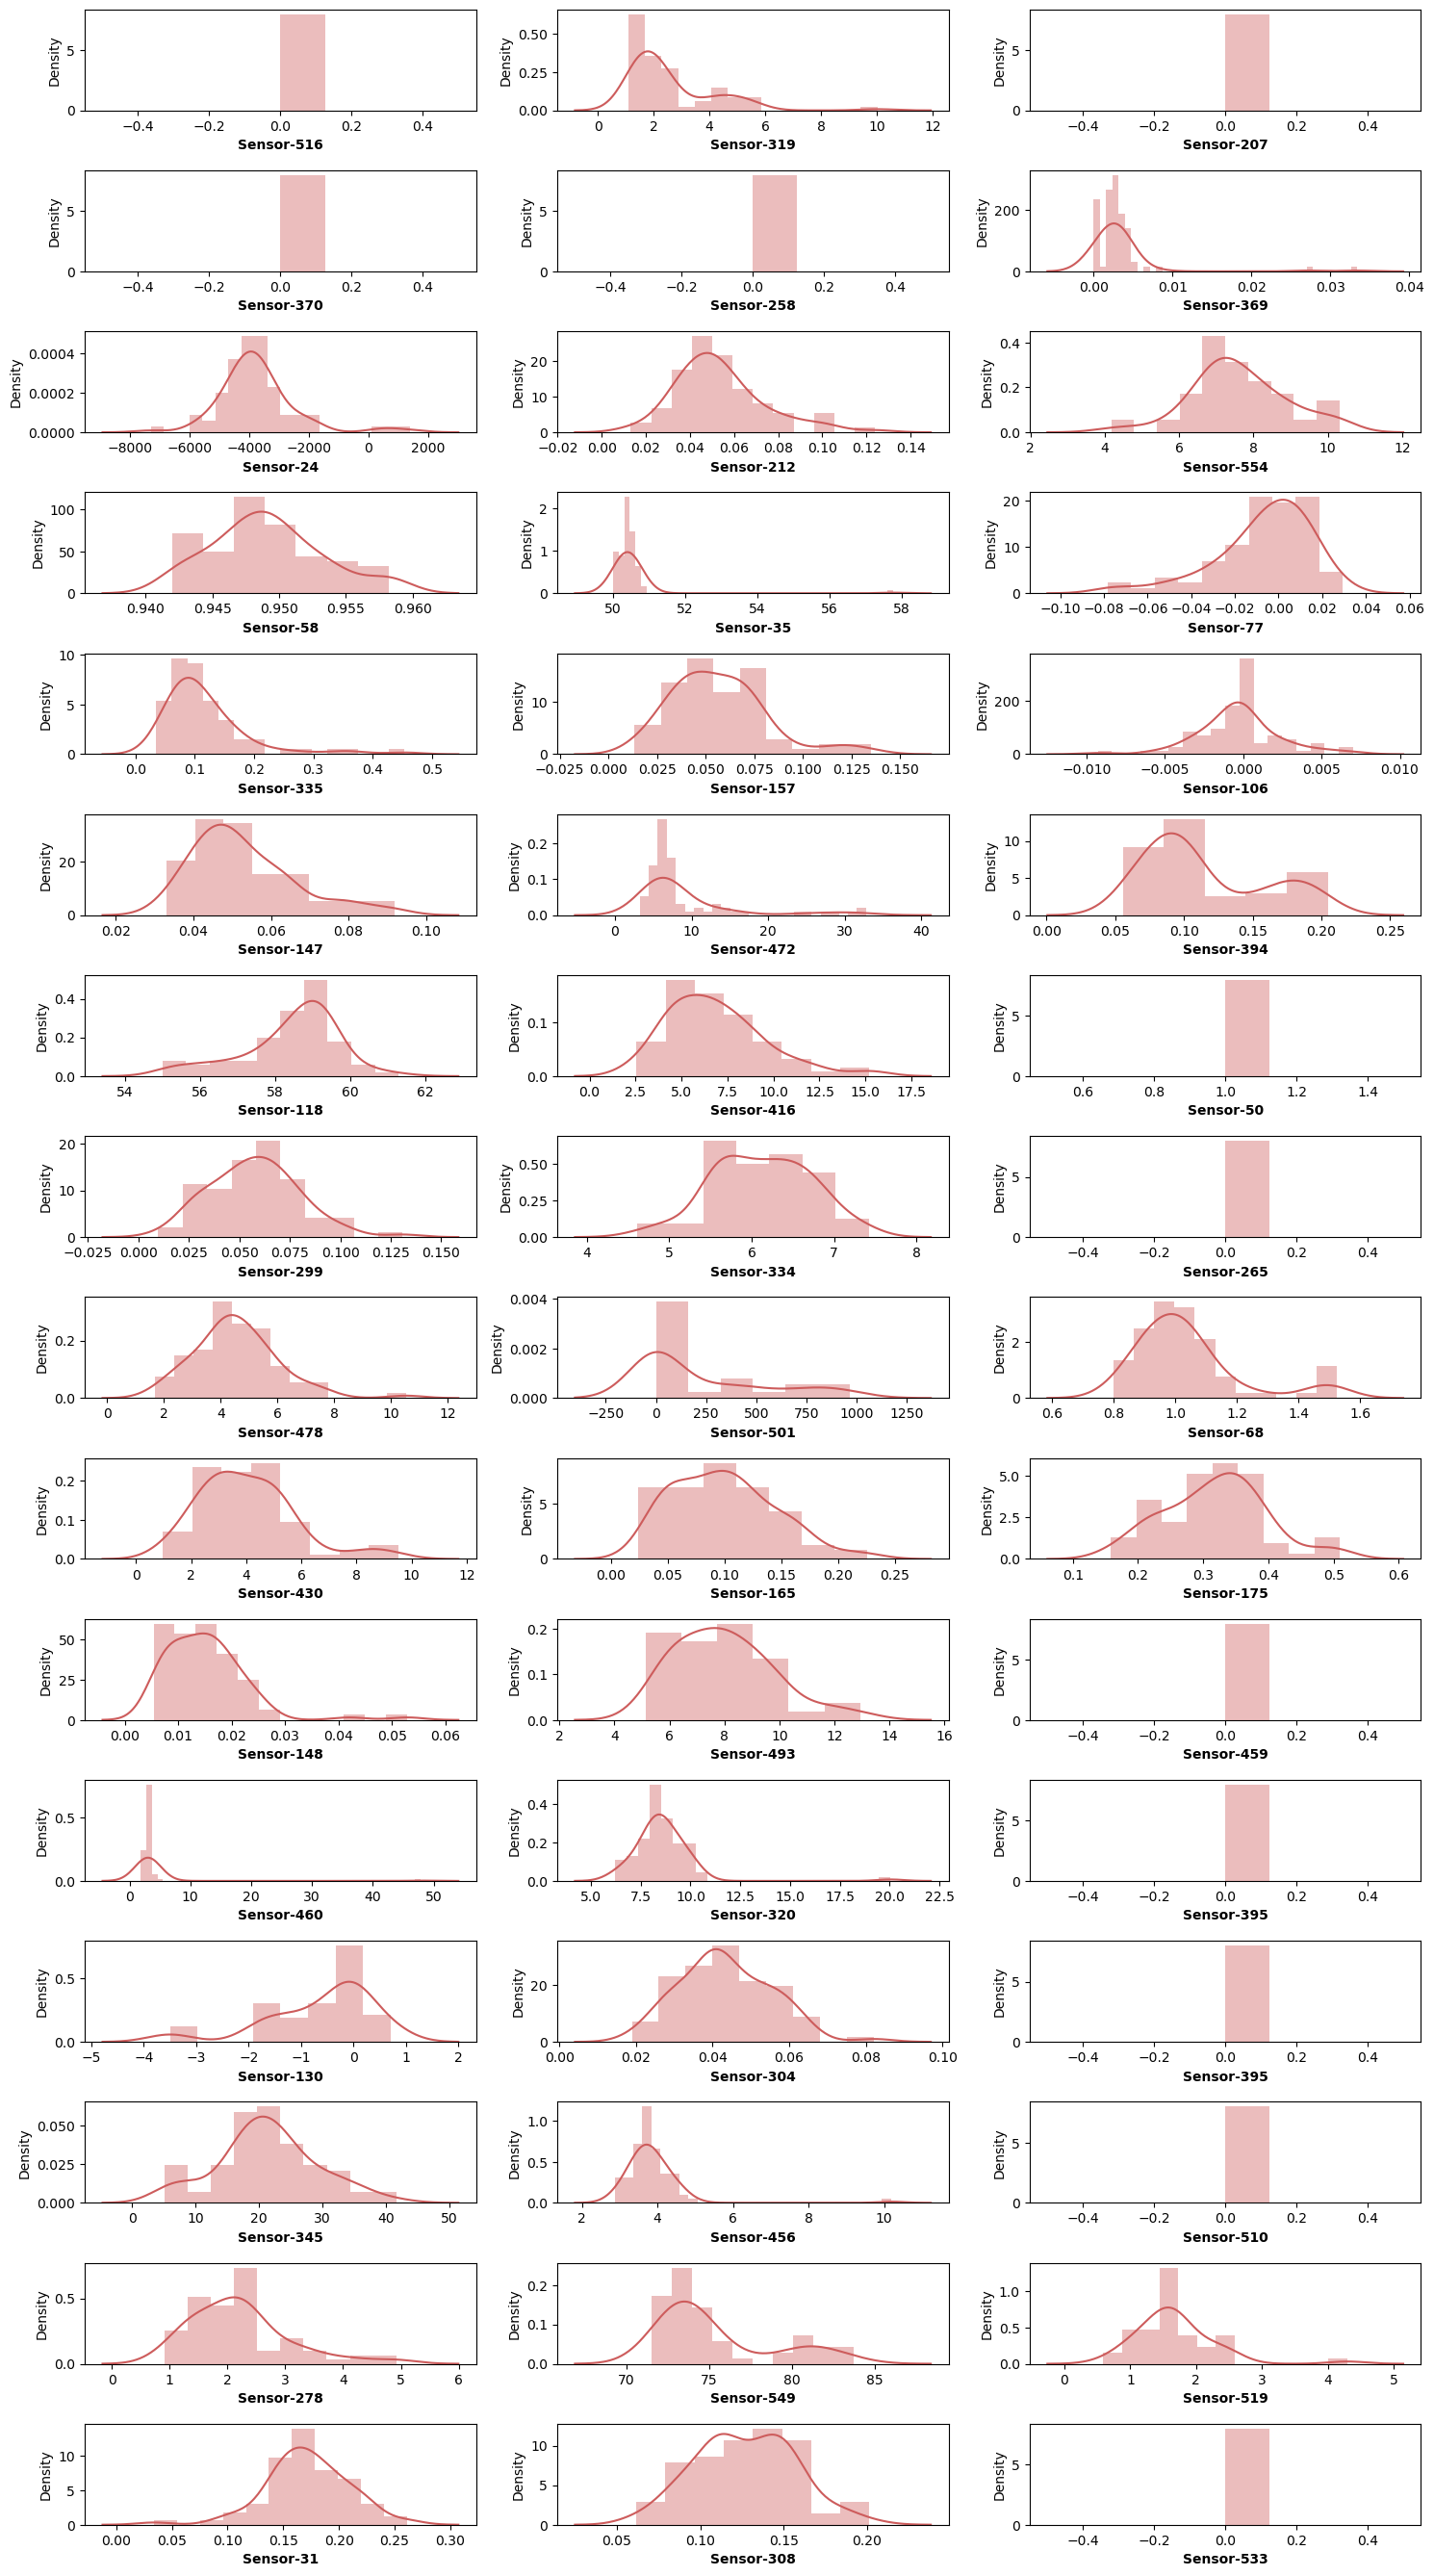

In [19]:
# Select 50 randon sensors
random_50_sensors_idx = []
for i in range(50):
    if i not in random_50_sensors_idx:
        random_50_sensors_idx.append(np.random.randint(1,591))
        
# Lets now, have a look at the distribution of random 50 sensors
plt.figure(figsize=(15,100))

for i, col in enumerate(wafers.columns[random_50_sensors_idx]):
    plt.subplot(60, 3, i+1)
    sns.distplot(x = wafers[col], color = 'indianred')
    plt.xlabel(col, weight='bold')
    plt.tight_layout()

### Insight:

Pretty good amount of them (either first 50 or random 50) either are constant (have 0 standard deviation) or have left skewness and right skewness. It ain't possible to analyze each feature and deal with its outliers individually, thus we oughta depend upon the scaling. 

For the **features with 0 standard deviation**, we can straight away drop them and for others that do have outliers, we gotta go ahead with the `Robust Scaling`.

### # Get Columns to Drop:

Will drop columns with zero standard deviation as they are not influencing the target variable in any way.

In [20]:
def get_cols_with_zero_std(df: pd.DataFrame) -> list:
    """
    Returns a list of columns names who are having zero standard deviation.
    """
    
    cols_to_drop = []
    num_cols = [col for col in df.columns if df[col].dtype != 'O']
    
    for col in num_cols:
        if df[col].std() == 0:
            cols_to_drop.append(col)
    
    return cols_to_drop

def get_redundant_cols(df: pd.DataFrame, missing_threshold=.7) -> list:
    """
    Returns a list of columns having missing values more than certain thresh.
    """
    
    cols_missing_ratios = df.isna().sum().div(df.shape[0])
    cols_to_drop = list(cols_missing_ratios[cols_missing_ratios > missing_threshold].index)
    return cols_to_drop

In [21]:
pd.DataFrame(wafers.dtypes)

,0
wafer,object
Sensor-1,float64
Sensor-2,float64
Sensor-3,float64
Sensor-4,float64
...,...
Sensor-587,float64
Sensor-588,float64
Sensor-589,float64
Sensor-590,float64


In [22]:
# Columns w missing values more than 70%
cols_to_drop_1 = get_redundant_cols(wafers)
cols_to_drop_1

['Sensor-158', 'Sensor-159', 'Sensor-293', 'Sensor-294']

In [23]:
# Columns w 0 std
cols_to_drop_2 = get_cols_with_zero_std(wafers)
cols_to_drop_2.append('wafer')
cols_to_drop_2

['Sensor-6',
 'Sensor-14',
 'Sensor-43',
 'Sensor-50',
 'Sensor-53',
 'Sensor-70',
 'Sensor-75',
 'Sensor-98',
 'Sensor-142',
 'Sensor-150',
 'Sensor-179',
 'Sensor-180',
 'Sensor-187',
 'Sensor-190',
 'Sensor-191',
 'Sensor-192',
 'Sensor-193',
 'Sensor-194',
 'Sensor-195',
 'Sensor-207',
 'Sensor-210',
 'Sensor-227',
 'Sensor-230',
 'Sensor-231',
 'Sensor-232',
 'Sensor-233',
 'Sensor-234',
 'Sensor-235',
 'Sensor-236',
 'Sensor-237',
 'Sensor-238',
 'Sensor-241',
 'Sensor-242',
 'Sensor-243',
 'Sensor-244',
 'Sensor-257',
 'Sensor-258',
 'Sensor-259',
 'Sensor-260',
 'Sensor-261',
 'Sensor-262',
 'Sensor-263',
 'Sensor-264',
 'Sensor-265',
 'Sensor-266',
 'Sensor-267',
 'Sensor-277',
 'Sensor-285',
 'Sensor-314',
 'Sensor-315',
 'Sensor-316',
 'Sensor-323',
 'Sensor-326',
 'Sensor-327',
 'Sensor-328',
 'Sensor-329',
 'Sensor-330',
 'Sensor-331',
 'Sensor-343',
 'Sensor-348',
 'Sensor-365',
 'Sensor-370',
 'Sensor-371',
 'Sensor-372',
 'Sensor-373',
 'Sensor-374',
 'Sensor-375',
 'Se

In [24]:
# Columns to Drop
cols_to_drop = cols_to_drop_2 + cols_to_drop_1

### Separate Features and Labels out:

In [25]:
# Separate features and labels out

X, y = wafers.drop(cols_to_drop, axis=1), wafers[['Good/Bad']]

In [26]:
X

,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,-0.0066,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,0.0025,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,0.0135,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,-0.0064,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,0.0037,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,3071.05,2642.15,2200.9889,1054.5240,1.3830,100.1800,0.1201,1.4532,0.0049,-0.0048,...,NaN,0.4973,0.0139,0.0039,2.7851,0.0122,0.0131,0.0039,107.5257,-1
71,3043.18,2545.53,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.3824,-0.0001,-0.0050,...,NaN,0.4989,0.0131,0.0036,2.6253,0.0218,0.0054,0.0020,24.6547,-1
14,3001.26,2519.92,2224.6778,1308.6479,1.3907,101.1333,0.1208,1.5172,-0.0135,0.0070,...,48.4818,0.4959,0.0142,0.0037,2.8609,0.0278,0.0135,0.0042,48.4818,-1
92,3007.00,2572.62,2213.2111,2070.7147,1.9705,87.7411,0.1232,1.4446,-0.0050,-0.0007,...,NaN,0.4987,0.0172,0.0041,3.4417,0.0195,0.0149,0.0047,76.0035,-1


In [27]:
y

,Good/Bad
55,-1
88,-1
26,-1
42,-1
69,-1
...,...
60,-1
71,-1
14,-1
92,-1


In [28]:
# Independent feature variables
print('Shape of the feature now: ', X.shape)
X.head()

Shape of the feature now:  (80, 465)


,Sensor-1,Sensor-2,Sensor-3,Sensor-4,Sensor-5,Sensor-7,Sensor-8,Sensor-9,Sensor-10,Sensor-11,...,Sensor-582,Sensor-583,Sensor-584,Sensor-585,Sensor-586,Sensor-587,Sensor-588,Sensor-589,Sensor-590,Good/Bad
55,NaN,2532.45,2191.1333,2197.6570,1.1569,89.7222,0.1251,1.5762,0.0028,-0.0066,...,NaN,0.4936,0.0113,0.0033,2.2874,0.0133,0.0139,0.0038,104.3034,-1
88,3221.21,2391.20,2189.9667,1046.6212,0.8662,102.3622,0.1208,1.4756,-0.0025,0.0025,...,NaN,0.4940,0.0123,0.0033,2.4860,0.0280,0.0078,0.0022,27.7601,-1
26,2951.85,2525.00,2189.5777,1320.3197,1.3459,100.7744,0.1234,1.5590,-0.0032,0.0135,...,53.8577,0.5025,0.0178,0.0045,3.5361,0.0286,0.0154,0.0056,53.8577,-1
42,2982.07,2447.06,2199.6334,1242.8420,1.4083,99.2178,0.1221,1.4542,0.0142,-0.0064,...,NaN,0.4993,0.0151,0.0038,3.0214,0.0117,0.0262,0.0089,223.1018,-1
69,3058.08,2524.60,2192.3778,1110.5453,0.8147,99.2922,0.1226,1.4958,0.0004,0.0037,...,24.6547,0.4974,0.0171,0.0040,3.4352,0.0218,0.0054,0.0020,24.6547,-1


In [29]:
# Dependent/Target varibales
print('Shape of labels: ', y.shape)
y.head()

Shape of labels:  (80, 1)


,Good/Bad
55,-1
88,-1
26,-1
42,-1
69,-1


# Data Transformation:

In [30]:
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler

preprocessing_pipeline = Pipeline(
    steps=[('Imputer', KNNImputer(n_neighbors=3)), ('Scaler', RobustScaler())]
)

preprocessing_pipeline

Pipeline(steps=[('Imputer', KNNImputer(n_neighbors=3)),
                ('Scaler', RobustScaler())])

In [31]:
# Transform "Wafers" features

x_trans = preprocessing_pipeline.fit_transform(X)
print('Shape of transformed features set: ',x_trans.shape)
x_trans

Shape of transformed features set:  (80, 465)


array([[-0.02781221,  0.37395233, -0.4289214 , ...,  0.        ,
         0.75955556,  0.        ],
       [ 2.50431022, -1.38644649, -0.47986463, ..., -0.51612903,
        -0.52610857,  0.        ],
       [-0.60204699,  0.28110298, -0.49685153, ...,  0.58064516,
        -0.08775867,  0.        ],
       ...,
       [-0.03223295,  0.21779093,  1.03590393, ...,  0.12903226,
        -0.17805529,  0.        ],
       [ 0.03396281,  0.87459106,  0.53517467, ...,  0.29032258,
         0.28421459,  0.        ],
       [ 0.86164048,  0.3813055 , -0.59146288, ..., -0.16129032,
        -0.20782888,  0.        ]])

# Resampling of Training Insatances:
Resampling is imperative in this case as the target variable if highly imbalanced.

In [32]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [33]:
from imblearn.combine import SMOTETomek

X, y = x_trans[:, :-1], y
resampler = SMOTETomek(sampling_strategy = 'auto')
x_res, y_res = resampler.fit_resample(X, y)

In [34]:
print("Before resample, shape of training instance: ", np.c_[X,y].shape)
print("After resample, shape of training insttance: ", np.c_[x_res,y_res].shape)

Before resample, shape of training instance:  (80, 465)
After resample, shape of training insttance:  (148, 465)


In [35]:
X.shape, y.shape

((80, 464), (80, 1))

In [36]:
x_res.shape, y_res.shape

((148, 464), (148, 1))

In [37]:
print(np.unique(y_res))
print("Value Counts:")
y_res.value_counts()

[-1  1]
Value Counts:


Good/Bad
-1          74
 1          74
Name: count, dtype: int64

# Prepare the Test set:
Do exactly the same to test set whatever's been done to the test set

In [38]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, test_size = 1/3, random_state = 42)

print("Train set: ", x_train.shape, y_train.shape)
print("Test set: ", x_test.shape, y_test.shape)

Train set:  (98, 464) (98, 1)
Test set:  (50, 464) (50, 1)


# Model Selection and Training

In [39]:
pip install xgboost

In [40]:
# Prepared training and test sets

x_prep = x_train
y_prep = y_train
x_test_prep = x_test
y_test_prep = y_test

print(x_prep.shape, y_prep.shape)
print(x_test_prep.shape, y_test_prep.shape)

(98, 464) (98, 1)
(50, 464) (50, 1)


In [41]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score

svc_clf = SVC(kernel='linear')
svc_rbf_clf = SVC(kernel='rbf')
random_clf = RandomForestClassifier(random_state=42)
cgb_clf = XGBClassifier(objective='binary:logistic')

In [42]:
# A function to display scores

def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

### Evaluating SVC(kernel='linear') using corss-validation

In [44]:
svc_scores = cross_val_score(svc_clf, x_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [45]:
display_scores(svc_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [46]:
# Performance on test ste using corss-validation

#Prediction using corss-validation
svc_preds = cross_val_predict(svc_clf, x_test_prep, y_test_prep, cv = 5, verbose=2)

svc_auc = roc_auc_score(y_test_prep, svc_preds)
svc_auc


0.9

### Evaluating SVC(kernel='rbf') using corss-validation

In [48]:
# SVC rbf scores

svc_rbf_scores = cross_val_score(svc_rbf_clf, x_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [49]:
display_scores(svc_rbf_scores)

Scores:  [1.   0.68 1.   0.96 0.76 1.   0.96 0.88 1.   1.  ]
Mean:  0.924
Standard Deviation:  0.10947145746723208


In [50]:
# Performance on test set using corss-validation


# Prediction using cross-validation
svc_rbf_preds = cross_val_predict(svc_rbf_clf, x_test_prep, y_test_prep, cv=5)

# AUC score
svc_rbf_suc = roc_auc_score(y_test, svc_rbf_preds)

In [51]:
svc_rbf_suc

0.6799999999999999

### # Evaluating `RandomForestClassifier` using cross-validation:

In [52]:
## Random Forest Scores

random_clf_scores = cross_val_score(random_clf, y_prep, y_prep, scoring='roc_auc', cv=10, verbose=2)

[CV] END .................................................... total time=   0.1s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [53]:
display_scores(random_clf_scores)

Scores:  [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean:  1.0
Standard Deviation:  0.0


In [54]:
## Performance on test set using cross-validation

# Predictions using cross-validation
random_clf_preds = cross_val_predict(random_clf, x_test_prep, y_test_prep, cv=5)

# AUC score
random_clf_auc = roc_auc_score(y_test_prep, random_clf_preds)
random_clf_auc

1.0